# Mass-Casualty Triage Exercise
## Compbio Camp - February 2019
### Author: Eric Friedlander


# <span style='color:blue'>*YOUR NAME HERE*</span>

We are going to be modeling different patient admission policiees over the course of the 12 hours (720 minutes) following a mass-casualty event! By finding the best policy in different scenarios we can more effectively provide treatment and save lives. First, we need to import several packages which will be helpful.

In [23]:
# Import all necessary packages
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from triage_funcs import *

# Import poisson process package
from tick.base import TimeFunction
from tick.hawkes import SimuInhomogeneousPoisson

## Modeling Patient Arrivals

The function below is commonly used to model the arrival intensity of patients. Notice that we need several packages in order to perform our analysis. There are two parameters: `num_pat` controls the number of patients expected on average and `peak` controls when the number of arrivals with be at its highest intensity. Try playing with the values and see how it changes the intensity curve (make sure to pay attention to the $y$-axis).

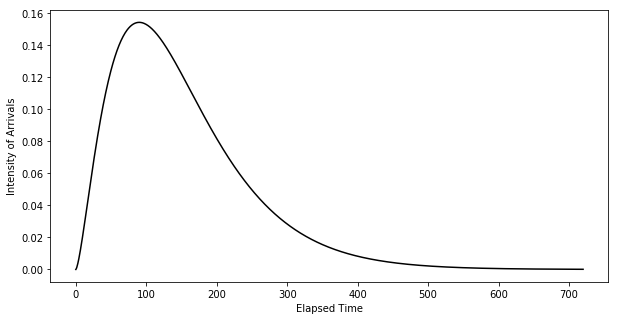

In [24]:
# Parameters for the curve
num_pat = 30
peak = 2.5

# Lets plot a sample of the arrival rate function
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, arr_int(tp, num_pat, peak), color='black')
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.show() 

What would happen if the IMMEDIATE (orange) and DELAYED (blue) patients arrived in different ways? The cell below will generate plots of the arrival intensity for both classes of patients. You can change the way the curves look by altering the following variables:
1. `numPatients` - controls the **TOTAL** number of patients
2. `ratio` - the ratio of IMMEDIATE to DELAYED patients
3. `peakI` - the time of the peak arrival intensity for IMMEDIATE class patients
4. `peakD` - the time of the peak arrival intensity for DELAYED class patients

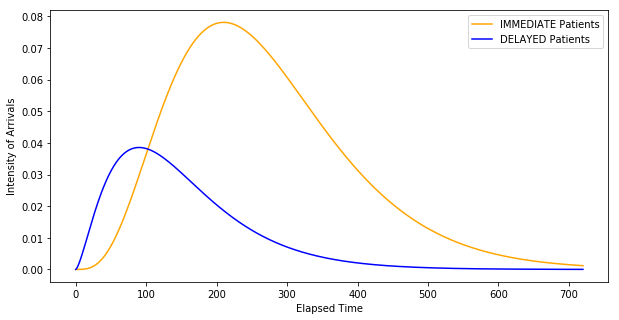

In [25]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients


# Compute parameters for functions
cI = numPatients / (1+ratio)
cD = numPatients - cI

# Lets plot the arrival rate functions for both classes of patients
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, arr_int(tp, cI, peakI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, arr_int(tp, cD, peakD), label='DELAYED Patients', color='blue') # First plot for green patients
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.legend()
plt.show() 

We can now use the computer to generate a sequence of arrivals. Run the cell below to see an example. Each simulated arrival is denoted by an x. Notice that you get different pictures every time you run it. Why is this? Where do the x's tend to fall?

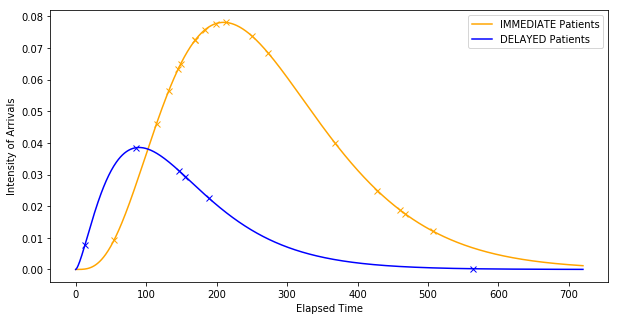

In [26]:
tp = np.linspace(0, 720, num = 1000)
yI = arr_int(tp, cI, peakI)
yD = arr_int(tp, cD, peakD)
tfI = TimeFunction((tp, yI))
tfD = TimeFunction((tp, yD))
red_ind = np.random.binomial(1, ratio/(1+ratio))
ppI = SimuInhomogeneousPoisson([tfI], end_time=720, verbose=False)
ppD = SimuInhomogeneousPoisson([tfD], end_time=720, verbose=False)
ppI.simulate()
ppD.simulate()

plt.plot(tp, arr_int(tp, cI, peakI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, arr_int(tp, cD, peakD), label='DELAYED Patients', color='blue') # First plot for green patients
plt.plot(ppI.timestamps[0], arr_int(ppI.timestamps[0], cI, peakI), color='orange', marker='x', linestyle='none')
plt.plot(ppD.timestamps[0], arr_int(ppD.timestamps[0], cD, peakD), color='blue', marker='x', linestyle='none')
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.legend()
plt.show() 

## Modeling Patient Survival
What happens when we redirect a patient to another hospital? There is some probability that the patient may die before reaching the next hospital. We can use the computer to generate ***random numbers*** for us. If we give the computer a probability, it can flip a coin for us. In our simulation, we can say that patients survive when a heads comes up. Why might we want the computer to do this? Why not just come up with the numbers ourselves? 

See if you can beat the mindreader: http://www.mindreaderpro.appspot.com/

The cell below generates a sequence of random zeros and ones. Let's say that a one means a patient survives the trip to the next hospital and zeros means that they don't make it. The parameter `prob` represents the probability of survival. What happens when you increase `prob`? What do you think appropriate values of `prob` might be for our IMMEDIATE and DELAYED class patients.

In [27]:
prob = .6 # parameter controlling the probability of survival
np.random.binomial(1, prob, size = 20)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

## Putting It All Together
Now we will take all of these inputs and run an actual simulation of a mass casualty event. Let's see how a simulation might work. Run the cell below and follow the direction in the output. For now, **don't change any parameters**.

In [28]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients

# Probabilities of surviving the trip to another hospital
probI = .4
probD = .8


# Compute parameters for functions"
cI = numPatients / (1+ratio)
cD = numPatients - cI



tp = np.linspace(0, 720, num = 1000)
yI = arr_int(tp, cI, peakI)
yD = arr_int(tp, cD, peakD)
tfI = TimeFunction((tp, yI))
tfD = TimeFunction((tp, yD))
imm_ind = np.random.binomial(1, ratio/(1+ratio))
ppI = SimuInhomogeneousPoisson([tfI], end_time=720, verbose=False)
ppD = SimuInhomogeneousPoisson([tfD], end_time=720, verbose=False)
ppI.simulate()
ppD.simulate()
if imm_ind == 1:
    time = np.random.choice(ppI.timestamps[0])/720 * 120
    col = 'ORANGE'
    survive = np.random.binomial(1, probI)
else:
    time = np.random.choice(ppD.timestamps[0])/720 * 120
    col = 'BLUE'
    survive = np.random.binomial(1, probD)
print('Grab a '+ col + ' index card from the front and write ' 
      + str(np.round(time,1)) + ' on the front and ' + str(survive) + ' on the back.')
    

Grab a BLUE index card from the front and write 70.3 on the front and 0 on the back.


Using the computer we can run this simulation MANY times. The parameter `num_reps` controls the number of times the simulation is run. We can also try out many different parameters.
Try out some different parameters and running the simulation below. Why might we want to run many simulations.

In [29]:
# How many simulations to run
num_reps = 1000

# Parameters for arrival processes
numPatients = 12 # Total number of patients on average
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients
divTime = 50 # Number of minutes it takes to get to the next hospital
num_beds = 5 # Number of beds in the hospita

# Probabilities of surviving the trip to another hospital
probI = .4
probD = .5

output = simulate(num_reps, num_beds, numPatients, ratio, peakI, peakD, probI, probD)

if num_reps == 1:
    print('FCFS resulted in '+ str(output[0][0]) + ' deaths and ' + str(output[2][0]) 
           + ' survivers with ' + str(output[4][0]) + ' beds remaining.')
    print('IMMEDIATE ONLY resulted in '+ str(output[1][0]) + ' deaths and ' + str(output[3][0]) 
           + ' survivers with ' + str(output[5][0]) + ' beds remaining.')
elif num_reps > 1:
    print('FCFS resulted in an average of '+ str(np.mean(output[0])) + ' deaths and ' + str(np.mean(output[2])) 
           + ' survivers with ' + str(np.mean(output[4])) + ' beds remaining.')
    print('IMMEDIATE ONLY resulted in an average of '+ str(np.mean(output[1])) + ' deaths and ' + str(np.mean(output[3])) 
           + ' survivers with ' + str(np.mean(output[5])) + ' beds remaining.')
else:
    raise Exception('Please input number of repetitions which is greater than 0.')

FCFS resulted in an average of 4.082 deaths and 7.857 survivers with 0.002 beds remaining.
IMMEDIATE ONLY resulted in an average of 3.918 deaths and 8.021 survivers with 0.076 beds remaining.


It may be helpful to look at the distribution of our simulation results, run the cell below to get some "box-and-whisker" plots of our simulated data.

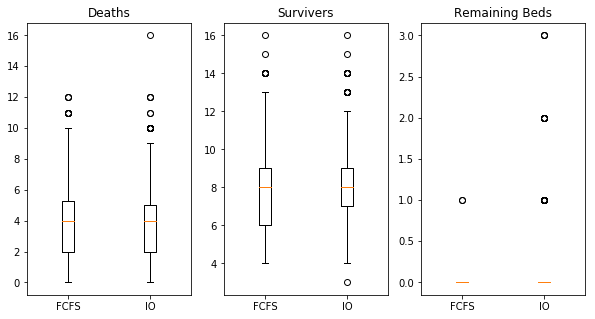

In [30]:
plt.subplot(1,3,1)
plt.boxplot(output[0:2])
plt.title('Deaths')
plt.xticks([1, 2], ['FCFS', 'IO'])

plt.subplot(1,3,2)
plt.boxplot(output[2:4])
plt.title('Survivers')
plt.xticks([1, 2], ['FCFS', 'IO'])

plt.subplot(1,3,3)
plt.boxplot(output[4:])
plt.title('Remaining Beds')
plt.xticks([1, 2], ['FCFS', 'IO'])

plt.show()